In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head(2)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ','_')

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life_expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult_Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant_deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage_expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis_B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five_deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [118]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [119]:
df['Life_expectancy'].isnull().sum()

10

In [120]:
#Removing the null rows from the Target feature
df.dropna(subset = ['Life_expectancy'], axis=0,inplace=True)
df['Life_expectancy'].isnull().sum()

0

In [121]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>1 and feature not in ['Year','Life_expectancy'] ]

features_with_na

['Alcohol',
 'Hepatitis_B',
 'BMI',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'GDP',
 'Population',
 'thinness__1-19_years',
 'thinness_5-9_years',
 'Income_composition_of_resources',
 'Schooling']

In [122]:
features_without_na = [feature for feature in df.columns if df[feature].isnull().sum() == 0 and feature not in ['Life_expectancy'] ]

features_without_na

['Country',
 'Year',
 'Status',
 'Adult_Mortality',
 'infant_deaths',
 'percentage_expenditure',
 'Measles',
 'under-five_deaths',
 'HIV/AIDS']

In [123]:
X = df.drop('Life_expectancy',axis=1)
y = df['Life_expectancy']

In [124]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [125]:
x_train.shape,x_test.shape

((2049, 21), (879, 21))

In [126]:
x_train[features_with_na]

,Alcohol,Hepatitis_B,BMI,Polio,Total_expenditure,Diphtheria,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
2176,12.68,99.0,41.3,99.0,6.81,99.0,NaN,NaN,4.3,4.4,0.707,12.8
2291,7.82,99.0,3.1,99.0,3.91,99.0,1192.517400,82858.0,6.0,6.4,0.712,12.1
1773,1.20,75.0,18.9,73.0,6.51,78.0,385.756714,21547463.0,3.8,3.7,0.353,7.9
2595,1.75,53.0,54.9,98.0,7.95,97.0,NaN,NaN,2.5,2.6,0.000,11.9
1061,2.02,96.0,48.6,94.0,6.33,96.0,3299.651390,1527156.0,1.2,1.2,0.616,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,4.22,94.0,49.5,94.0,4.47,94.0,3171.498560,27949944.0,1.2,1.2,0.693,13.0
1182,6.61,NaN,55.9,97.0,1.70,97.0,3944.999000,289521.0,1.0,0.9,0.866,17.6
1346,NaN,98.0,53.1,98.0,NaN,98.0,159.981700,17544126.0,2.4,2.5,0.793,15.0
527,1.51,NaN,16.5,38.0,4.24,37.0,243.542932,3754986.0,1.5,1.5,0.312,5.2


In [127]:
def replace_missing_values_with_Countries_mean(Column_name,train_or_test):
    mean_imputed_list = []
    train_or_test[Column_name].fillna(0,inplace=True)
    

    for country in train_or_test.Country.unique():
        temp_df = train_or_test[train_or_test.Country == country]
        countries_mean = temp_df[Column_name].median()
        
        for index,row in temp_df.iterrows():
            if row[Column_name] == 0:
                mean_imputed_list.append(countries_mean)
            else:
                mean_imputed_list.append(row[Column_name])
                
    return mean_imputed_list

In [128]:
misssing_cols_value_list = ['Population','GDP','Alcohol','Total_expenditure',
'Income_composition_of_resources','Schooling','BMI','thinness_5-9_years',
'thinness__1-19_years','Polio','Hepatitis_B','Diphtheria']

for cols in misssing_cols_value_list:
    replaced_list = replace_missing_values_with_Countries_mean(cols,x_train)
    x_train[cols] = replaced_list
    replaced_list = replace_missing_values_with_Countries_mean(cols,x_test)
    x_test[cols] = replaced_list

C:\Users\ThinkPad\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\ThinkPad\AppData\Local\Temp/ipykernel_12924/2472549687.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[cols] = replaced_list
C:\Users\ThinkPad\AppData\Local\Temp/ipykernel_12924/2472549687.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [129]:
x_train.isnull().sum()

Country                            0
Year                               0
Status                             0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [130]:
x_test.isnull().sum()

Country                            0
Year                               0
Status                             0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [131]:
x_test

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
2757,United Arab Emirates,2004,Developing,95.0,1,1.77,2972.448675,92.0,22,57.0,...,94.0,2.46,94.0,0.1,36161.176100,0.0,5.2,4.9,0.813,12.4
780,Dominican Republic,2005,Developing,28.0,7,1.75,289.741865,96.0,0,58.6,...,96.0,3.45,96.0,2.0,42112.235650,0.0,5.1,5.0,0.826,13.3
2737,Ukraine,2008,Developing,273.0,5,1.67,456.458666,92.0,48,55.0,...,94.0,2.48,94.0,0.4,3161.529350,0.0,5.3,5.1,0.798,12.0
990,Georgia,2003,Developing,132.0,1,1.73,70.541853,93.0,216,55.1,...,94.0,4.50,93.0,0.1,3372.575170,0.0,5.1,4.9,0.831,13.2
108,Armenia,2003,Developing,134.0,1,1.69,7.341493,94.0,4,55.8,...,94.0,3.93,94.0,0.1,3549.148320,0.0,5.1,4.9,0.826,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Belgium,2003,Developed,95.0,0,0.02,507.306164,67.0,44,13.8,...,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8
199,Bangladesh,2008,Developing,147.0,144,0.01,42.488650,66.0,2660,16.7,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
2700,Turkmenistan,2012,Developing,22.0,7,0.08,579.412824,19.0,0,31.7,...,73.0,4.34,73.0,0.1,0.000000,0.0,14.0,14.0,0.444,7.9
2640,Tonga,2008,Developing,145.0,0,0.04,569.625504,78.0,0,35.7,...,78.0,5.12,78.0,0.1,0.000000,0.0,13.8,13.7,0.480,8.5


In [132]:
x_train.drop(labels=['Year','Country'],axis=1,inplace=True)
x_test.drop(labels=['Year','Country'],axis=1,inplace=True)

C:\Users\ThinkPad\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

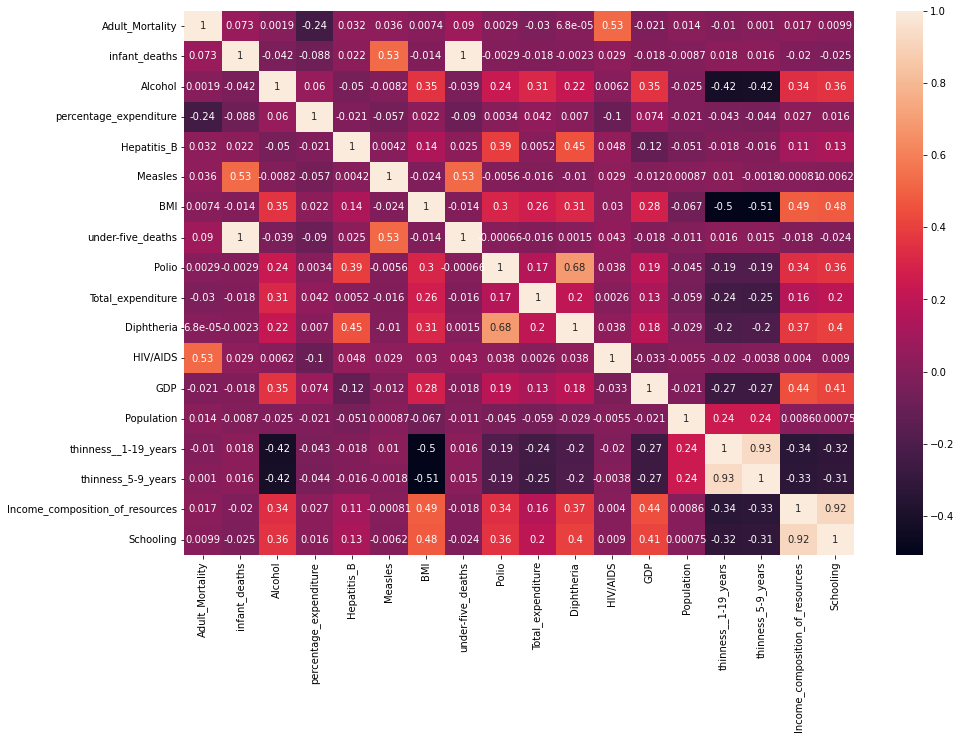

In [133]:
plt.figure(figsize=(15,10))
sns.heatmap(x_train.corr(method='pearson'),annot=True)

In [134]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [135]:
corr_features = correlation(x_train, 0.75)
corr_features

{'Schooling', 'thinness_5-9_years', 'under-five_deaths'}

In [136]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [153]:
x_train

,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,Income_composition_of_resources
2176,Developing,151.0,0,12.680,0.000000,99.0,0,41.3,99.0,6.81,99.0,0.1,0.000000,0.0,4.3,0.707
2291,Developing,185.0,0,11.090,21.465313,95.0,0,43.0,95.0,8.12,95.0,0.1,0.000000,0.0,4.3,0.717
1773,Developing,434.0,78,10.870,58.596445,97.0,183,43.8,97.0,8.10,97.0,16.3,0.000000,0.0,4.3,0.724
2595,Developing,12.0,0,11.850,0.000000,14.0,5,37.9,9.0,6.33,74.0,0.1,0.000000,0.0,4.4,0.681
1061,Developing,189.0,11,11.090,484.718789,99.0,0,47.5,99.0,7.43,99.0,0.4,0.000000,0.0,4.3,0.735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Developing,134.0,12,2.580,448.767046,98.0,0,42.0,98.0,2.16,98.0,0.4,26.371428,487137.0,3.3,0.000
1182,Developed,65.0,0,2.645,725.485316,99.0,0,48.6,99.0,2.80,99.0,0.1,6432.668768,5565284.0,3.3,0.688
1346,Developing,198.0,4,2.900,0.000000,97.0,526,37.5,98.0,3.94,97.0,0.1,643.175180,4516131.0,3.6,0.000
527,Developing,49.0,16,2.480,30.783827,96.0,3207,44.2,96.0,1.99,96.0,14.3,4439.230000,58721.0,3.2,0.000


In [155]:
x_train = pd.get_dummies(x_train,columns=['Status'],drop_first=True)

In [157]:
x_test = pd.get_dummies(x_test,columns=['Status'],drop_first=True)

In [142]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score

In [150]:
num_folds = 10
seed = 5
scoring = 'neg_mean_squared_error'

In [151]:
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))

In [158]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, -cv_results.mean(), cv_results.std())   # - sign to show negative number
    print(msg)

LR: 33.350744 (4.218991)
KNN: 93.651350 (7.549118)
CART: 12.296376 (1.311703)


In [159]:
from sklearn.linear_model import Lasso

In [161]:
rslt = cross_val_score(Lasso(), x_train, y_train, cv=kfold, scoring=scoring)
rslt.mean()

-36.83763737221831